In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
from collections import defaultdict
from copy import deepcopy
from itertools import chain
import random
import time
import itertools
import math
from collections import deque
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#读取数据
count=input('何番目のデータまで読み込み?(0~9999)')
def search_and_load_csv(folder_path, keyword):

    all_dataframes = []  # ロードされたすべてのDataFramesを保存する
    
    # フォルダとサブフォルダ内のファイルを反復処理する
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # ファイルがCSVファイルで、ファイル名にキーワードが含まれているかチェックする
            if keyword in file and file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    # CSVファイルをDataFrameに読み込む
                    df = pd.read_csv(file_path)
                    all_dataframes.append(df)
                    print(f"ファイル読み込み成功: {file_path}")
                except Exception as e:
                    print(f"ファイル読み込めない {file_path}: {e}")

    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        return combined_df
    else:
        print("該当するCSVファイルが見つかりません")
        return pd.DataFrame()
    
for i in np.arange(0,int(count)+1):# 使用
    folder = "D:\\pysrc\\wang_data\\jobset\\normal Printed Circuit Board\\odder_mean[10],odder_std_dev[2]\\lot_mean[3],lot_std_dev[1]\\machine[13]\\seed[3]"
    #folder = "D:\\pysrc\\wang_data\\jobset\\normal Printed Circuit Board\\odder_mean[15],odder_std_dev[3]\\lot_mean[5],lot_std_dev[2]\\machine[13]\\seed[3]"
    #folder = "D:\\pysrc\\wang_data\\jobset\\normal Printed Circuit Board\\odder_mean[20],odder_std_dev[5]\\lot_mean[7],lot_std_dev[3]\\machine[13]\\seed[3]"
    #folder = "D:\\pysrc\\wang_data\\jobset\\double normal\\j1[5,1],j2[8,1]\\p1[5,1],p2[8,1]\\machine[4]\\t1[10,1],t2[15,1]\\seed[3]" 
    keyword = ","+str(i)+"gene"  # キーワードを変わる
    globals()[f"df{i}"] = search_and_load_csv(folder, keyword)

# 打印结果
#if not df_i.empty:
    #print("合并后的DataFrame:")
    #print(df_i.head())
#else:
    #print("未加载任何数据。")

ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,0gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,1gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,2gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,3gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,4gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\normal Printed Circuit Board\odder_mean[10],odder_std_dev[2]\lot_mean[3],lot_std_dev[1]\machine[13]\seed[3]\[6]r[17]c,5gene.csv
ファイル

In [4]:
#machine_matrix=np.array([
        #[1, 2, 3, 4, 5, 6],
        #[2, 3, 6, 1, 5, 4],
        #[3, 6, 1, 2, 4, 5],
        #[6, 2, 1, 4, 5, 3],
        #[1, 3, 5, 6, 2, 4],
        #[2, 6, 4, 1, 5, 3],
    #])

#time_matrix = np.array([
        #[1, 3, 6, 7, 3, 6],
        #[8, 5, 10, 10, 10, 4],
        #[5, 4, 8, 9, 1, 7],
        #[5, 5, 5, 3, 8, 9],
        #[9, 3, 5, 4, 3, 1],
        #[3, 3, 9, 10, 4, 1],
    #])

In [3]:
#数据转换
dfs = {}
T_genes = {}
MS_genes = {}

for i in np.arange(0,int(count)+1):
    df= globals()[f"df{i}"]
    T_gene = pd.DataFrame(index=df.index, columns=df.columns)
    MS_gene = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        for idx in df.index:
            value = df.loc[idx, col]
            if value.startswith('(') and value.endswith(')'):  # 判断元素是否为元组字符串
                 # 使用 ast.literal_eval 安全地将字符串转换为元组
                value_tuple = ast.literal_eval(value)
                T_gene.loc[idx, col] = float(value_tuple[1]) 
                MS_gene.loc[idx, col] = float(value_tuple[0]) 
            else:
                try:
                    # 如果是单一数字（字符串形式），尝试转换为浮动数值
                    T_gene.loc[idx, col] = float(value)
                    MS_gene.loc[idx, col] = float(value)
                except ValueError:
                    # 如果不能转换为数字，则保留原值
                    T_gene.loc[idx, col] = value
                    MS_gene.loc[idx, col] = value
    
    T_gene = T_gene.to_numpy()  
    globals()[f"T_gene{i}"] = T_gene[:,1:].astype(int)
    MS_gene = MS_gene.to_numpy() 
    globals()[f"MS_gene{i}"] = MS_gene[:,1:].astype(int)

In [4]:
ID=input('何回目のジョブデータを見たい?')
time_matrix = globals()[f"T_gene{ID}"]
machine_matrix = globals()[f"MS_gene{ID}"]
time_matrix[time_matrix == 0] = -1
machine_matrix[machine_matrix == 0] = -1
print(time_matrix)
print(machine_matrix)

[[  50  200  800  250  600  300  750  500  400  200  100   -1   -1   -1
    -1   -1   -1]
 [ 115  460 1610  250  600  690  750 1150  920  460  230   -1   -1   -1
    -1   -1   -1]
 [  60  240  960  250  840  250  600  360  750  600  480  240  120   -1
    -1   -1   -1]
 [  75  300 1050  250 1200  250  600  450  750  750  600  300  150   -1
    -1   -1   -1]
 [ 125  500 1750  250 2000  250  600  750  750 2000  250 1250 1000  500
   250   -1   -1]
 [  75  300 1050  250 1200  250  600  450  750 1200  250 1050  250  750
   600  300  150]]
[[ 1  3  4  6  7  8  9 10 11 12 13 -1 -1 -1 -1 -1 -1]
 [ 2  3  5  6  7  8  9 10 11 12 13 -1 -1 -1 -1 -1 -1]
 [ 1  3  4  6  5  6  7  8  9 10 11 12 13 -1 -1 -1 -1]
 [ 2  3  5  6  4  6  7  8  9 10 11 12 13 -1 -1 -1 -1]
 [ 1  3  5  6  4  6  7  8  9  4  6 10 11 12 13 -1 -1]
 [ 2  3  5  6  4  6  7  8  9  4  6  5  6 10 11 12 13]]


In [ ]:
time_matrix_small=np.array([[30,150,600,120,300,220,360,360,300,150,70,-1,-1,-1,-1,-1,-1],
                     [30,140,500,120,300,210,360,350,280,140,70,-1,-1,-1,-1,-1,-1],
                     [20,70,280,120,250,120,300,100,360,160,140,70,30,-1,-1,-1,-1],
                     [10,40,140,120,160,120,300,60,360,100,80,40,20,-1,-1,-1,-1],
                     [20,90,310,120,360,120,300,130,360,360,120,220,180,90,40,-1,-1],
                     [20,70,250,120,280,120,300,100,360,280,120,250,120,170,140,70,30]])

time_matrix_large=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job1 small
time_matrix_1_small=np.array([[20,80,300,250,600,100,750,150,130,80,40,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job2 small
time_matrix_2_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [20,100,300,250,600,140,750,200,180,100,50,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job3 small
time_matrix_3_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [20,90,300,250,280,250,600,140,750,200,160,90,50,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job4 small
time_matrix_4_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [30,100,350,250,350,250,60,150,750,250,200,120,60,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job5 small
time_matrix_5_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [20,90,280,250,320,250,600,150,750,350,250,200,180,90,50,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job6 small
time_matrix_6_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [20,80,250,250,280,250,600,120,750,280,250,250,250,180,150,90,50]])

#job1 3 5 small
time_matrix_135_small=np.array([[20,80,300,250,600,100,750,150,130,80,40,-1,-1,-1,-1,-1,-1],
                     [200,1000,3000,250,600,1400,750,2000,1800,1000,500,-1,-1,-1,-1,-1,-1],
                     [20,90,300,250,280,250,600,140,750,200,160,90,50,-1,-1,-1,-1],
                     [300,1000,3500,250,3500,250,600,1500,750,2500,2000,1200,600,-1,-1,-1,-1],
                     [20,90,280,250,320,250,600,150,750,350,250,200,180,90,50,-1,-1],
                     [200,800,2500,250,2800,250,600,1200,750,2800,250,2500,250,1800,1500,900,500]])

#job2 4 6 small
time_matrix_246_small=np.array([[200,800,3000,250,600,1000,750,1500,1300,800,400,-1,-1,-1,-1,-1,-1],
                     [20,100,300,250,600,140,750,200,180,100,50,-1,-1,-1,-1,-1,-1],
                     [200,900,3000,250,2800,250,600,1400,750,2000,1600,900,500,-1,-1,-1,-1],
                     [30,100,350,250,350,250,60,150,750,250,200,120,60,-1,-1,-1,-1],
                     [200,900,2800,250,3200,250,600,1500,750,3500,250,2000,1800,900,500,-1,-1],
                     [20,80,250,250,280,250,600,120,750,280,250,250,250,180,150,90,50]])




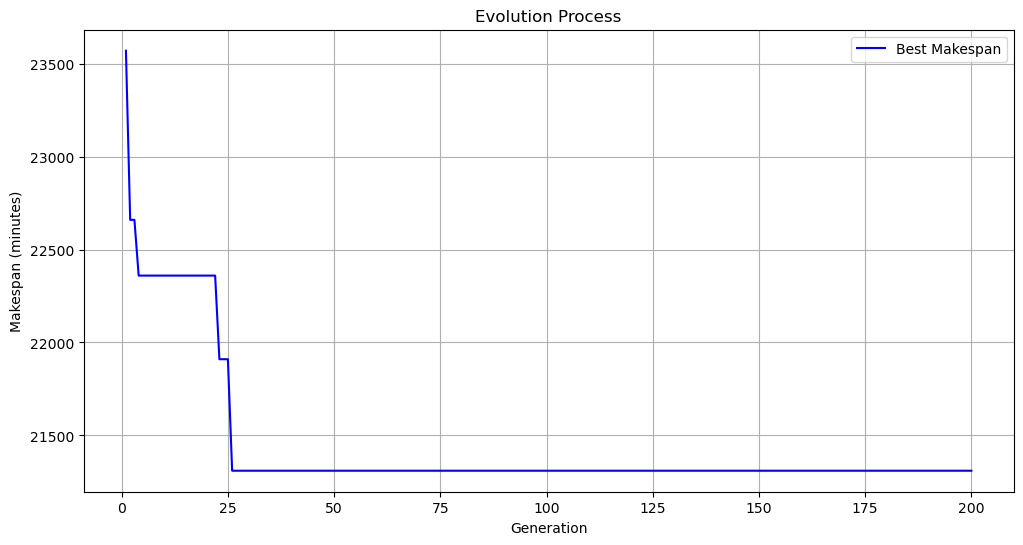

第 10 回的结果

最优完成时间: 21310 分钟
染色体验证结果: True


C:\Users\zako\AppData\Local\Temp\ipykernel_7376\3180490561.py:266: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(jobs))


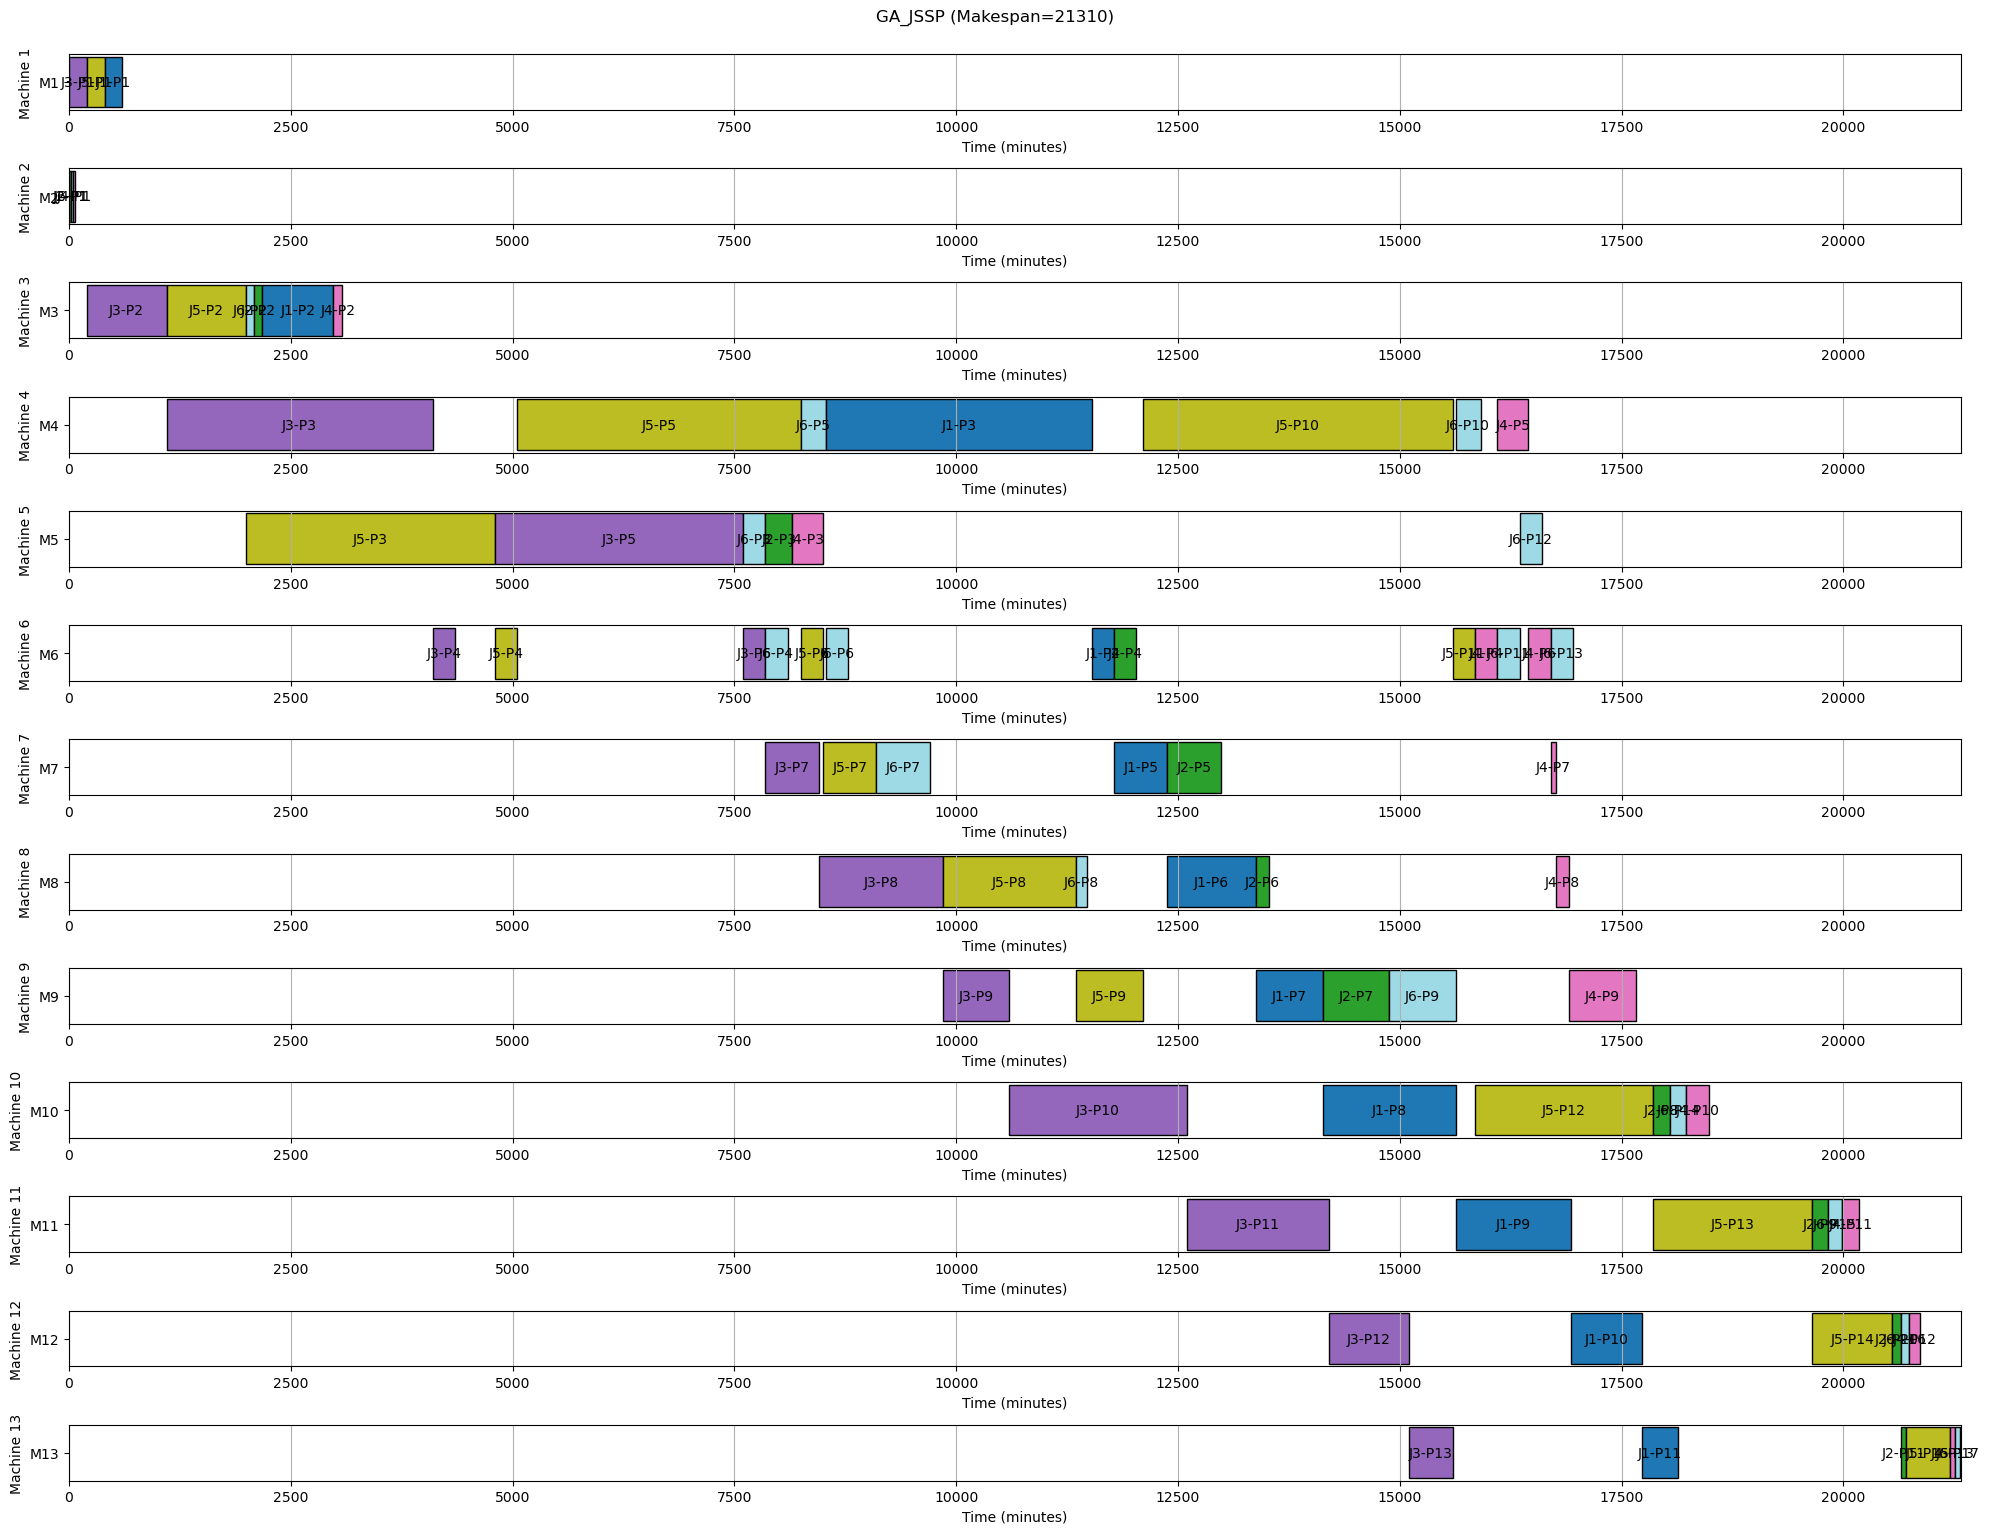

In [21]:
#运行（无AGV）

# 预处理生成工序列表
jobs = []
for job_id in range(len(time_matrix)):
    steps = []
    for step in range(len(time_matrix[job_id])):
        if time_matrix[job_id][step] == -1:
            break
        steps.append({
            'machine': machine_matrix[job_id][step] - 1,  # 转为0-based
            'duration': time_matrix[job_id][step]
        })
    jobs.append(steps)

# 遗传算法参数
POP_SIZE = 100
MAX_GEN = 200
CX_PROB = 0.8
MUT_PROB = 0.1
ELITE_SIZE = 2
TOURNAMENT_SIZE = 5

class Chromosome:
    def __init__(self, genes):
        self.genes = genes  # 格式: [(job_id, step_id), ...]
        self._makespan = None
    
    def validate(self):
        """验证工序顺序正确性"""
        job_progress = defaultdict(int)
        for gene in self.genes:
            job_id, step_id = gene
            if step_id != job_progress[job_id]:
                return False
            job_progress[job_id] += 1
        # 检查是否包含所有必需基因
        required = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        return set(self.genes) == required
    
    def repair(self):
        """染色体修复机制"""
        # 补全缺失基因并去除重复
        present_genes = set(self.genes)
        required_genes = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        missing = list(required_genes - present_genes)
        duplicates = list(present_genes - required_genes)
        
        # 替换重复基因
        new_genes = self.genes.copy()
        while duplicates and missing:
            dup_idx = next(i for i,g in enumerate(new_genes) if g in duplicates)
            new_genes[dup_idx] = missing.pop()
            duplicates.remove(new_genes[dup_idx])
        
        # 按作业顺序重新排序
        sorted_genes = []
        job_progress = defaultdict(int)
        remaining = new_genes.copy()
        while remaining:
            available = [g for g in remaining if g[1] == job_progress[g[0]]]
            if not available:  # 处理意外情况
                available = remaining
            selected = random.choice(available)
            sorted_genes.append(selected)
            job_progress[selected[0]] += 1
            remaining.remove(selected)
        
        self.genes = sorted_genes
        return self
    
    def makespan(self):
        """计算总完成时间（带缓存）"""
        if self._makespan is None:
            self._makespan = self._calculate_makespan()
        return self._makespan
    
    def _calculate_makespan(self):
        machine_times = defaultdict(int)
        job_times = defaultdict(int)
        
        for gene in self.genes:
            job_id, step_id = gene
            machine = jobs[job_id][step_id]['machine']
            duration = jobs[job_id][step_id]['duration']
            
            start = max(job_times[job_id], machine_times[machine])
            end = start + duration
            
            job_times[job_id] = end
            machine_times[machine] = end
        
        return max(job_times.values(), default=0)

def initialize_population():
    """初始化合法种群"""
    population = []
    for _ in range(POP_SIZE):
        genes = []
        job_progress = defaultdict(int)
        remaining = sum(len(job) for job in jobs)
        
        while remaining > 0:
            available_jobs = [j for j in range(len(jobs)) 
                            if job_progress[j] < len(jobs[j])]
            selected_job = random.choice(available_jobs)
            step = job_progress[selected_job]
            genes.append((selected_job, step))
            job_progress[selected_job] += 1
            remaining -= 1
            
        population.append(Chromosome(genes))
    return population

def strict_precedence_crossover(parent1, parent2):
    """严格顺序保留交叉"""
    # 创建工序池
    pool = defaultdict(list)
    for gene in parent1.genes + parent2.genes:
        pool[gene[0]].append(gene)
    
    # 合并工序链
    child_genes = []
    job_progress = defaultdict(int)
    
    while len(child_genes) < sum(len(job) for job in jobs):
        available_jobs = [j for j in range(len(jobs)) 
                        if job_progress[j] < len(jobs[j])]
        selected_job = random.choice(available_jobs)
        
        # 从两个父代中选择下一步工序
        candidates = [g for g in pool[selected_job] 
                     if g[1] == job_progress[selected_job]]
        if candidates:
            selected_gene = random.choice(candidates)
            child_genes.append(selected_gene)
            pool[selected_job].remove(selected_gene)
            job_progress[selected_job] += 1
    
    return Chromosome(child_genes).repair()

def enhanced_safe_mutation(chromosome):
    """增强安全变异"""
    genes = chromosome.genes.copy()
    
    # 寻找可交换位置（不同作业的非连续工序）
    swap_candidates = []
    for i in range(len(genes)):
        current_job, current_step = genes[i]
        # 检查是否是该作业的最后一步
        if current_step == len(jobs[current_job]) - 1:
            continue
        # 检查是否被相同作业的工序包围
        prev_same = (i > 0 and genes[i-1][0] == current_job)
        next_same = (i < len(genes)-1 and genes[i+1][0] == current_job)
        if not prev_same and not next_same:
            swap_candidates.append(i)
    
    if len(swap_candidates) >= 2:
        idx1, idx2 = random.sample(swap_candidates, 2)
        if genes[idx1][0] != genes[idx2][0]:
            genes[idx1], genes[idx2] = genes[idx2], genes[idx1]
    
    return Chromosome(genes).repair()

def tournament_selection(population):
    """锦标赛选择"""
    selected = []
    for _ in range(2):
        contestants = random.sample(population, TOURNAMENT_SIZE)
        contestants.sort(key=lambda x: x.makespan())
        selected.append(deepcopy(contestants[0]))
    return selected

def genetic_algorithm():
    population = initialize_population()
    best_chrom = min(population, key=lambda x: x.makespan())
    history = []
    
    for gen in range(MAX_GEN):
        # 种群修复
        population = [chrom.repair() for chrom in population]
        
        # 评估适应度
        fitnesses = []
        for chrom in population:
            if not chrom.validate():
                chrom._makespan = float('inf')
            fitnesses.append(chrom.makespan())
        
        # 记录历史数据
        current_best = min(fitnesses)
        history.append({
            'gen': gen+1,
            'best': current_best,
            'avg': np.mean(fitnesses),
            'worst': max(fitnesses)
        })
        
        # 更新全局最优
        if current_best < best_chrom.makespan():
            best_chrom = deepcopy(population[fitnesses.index(current_best)])
        
        # 精英选择
        elite = sorted(population, key=lambda x: x.makespan())[:ELITE_SIZE]
        
        # 生成新一代
        new_population = elite.copy()
        while len(new_population) < POP_SIZE:
            # 选择父代
            parent1, parent2 = tournament_selection(population)
            
            # 交叉
            if random.random() < CX_PROB:
                child = strict_precedence_crossover(parent1, parent2)
            else:
                child = random.choice([parent1, parent2])
            
            # 变异
            child = enhanced_safe_mutation(child)
            
            new_population.append(child)
        
        population = new_population[:POP_SIZE]
        
        #print(f"Generation {gen+1}: Best={current_best}")
    
    # 绘制进化曲线
    plt.figure(figsize=(12,6))
    gens = [h['gen'] for h in history]
    plt.plot(gens, [h['best'] for h in history], 'b-', label='Best Makespan')
    #plt.plot(gens, [h['avg'] for h in history], 'r--', label='Average Makespan')
    plt.xlabel('Generation')
    plt.ylabel('Makespan (minutes)')
    plt.title('Evolution Process')
    plt.legend()
    plt.grid()
    plt.show()
    
    return best_chrom

def plot_gantt(chromosome):
    """绘制甘特图"""
    schedule = defaultdict(list)
    machine_times = defaultdict(int)
    job_times = defaultdict(int)
    
    for gene in chromosome.genes:
        job_id, step_id = gene
        machine = jobs[job_id][step_id]['machine']
        duration = jobs[job_id][step_id]['duration']
        start = max(job_times[job_id], machine_times[machine])
        end = start + duration
        
        schedule[machine].append({
            'job': job_id+1,
            'step': step_id+1,
            'start': start,
            'end': end
        })
        
        job_times[job_id] = end
        machine_times[machine] = end
    
    plt.figure(figsize=(20, 15))
    colors = plt.cm.get_cmap('tab20', len(jobs))
    
    for idx, machine in enumerate(sorted(schedule.keys())):
        plt.subplot(len(schedule), 1, idx+1)
        tasks = sorted(schedule[machine], key=lambda x: x['start'])
        
        for task in tasks:
            plt.barh(
                y=f'M{machine+1}',
                width=task['end']-task['start'],
                left=task['start'],
                color=colors(task['job']-1),
                edgecolor='black'
            )
            plt.text(
                x=(task['start'] + task['end'])/2,
                y=f'M{machine+1}',
                s=f'J{task["job"]}-P{task["step"]}',
                va='center',
                ha='center'
            )
        
        plt.xlabel('Time (minutes)')
        plt.ylabel(f'Machine {machine+1}')
        plt.xlim(0, chromosome.makespan() + 10)
        plt.grid(axis='x')
    
    plt.tight_layout()
    plt.suptitle(f"GA_JSSP (Makespan={best_solution.makespan()})", y=1.02)
    plt.show()

# 运行算法
best_solution = genetic_algorithm()

# 输出结果
print('第',ID,'回的结果')
print(f"\n最优完成时间: {best_solution.makespan()} 分钟")
print("染色体验证结果:", best_solution.validate())
plot_gantt(best_solution)

In [44]:
for i in np.arange(0,int(count)+1):
    time_matrix = globals()[f"T_gene{i}"]
    machine_matrix = globals()[f"MS_gene{i}"]
    
    # 预处理生成工序列表
    jobs = []
    for job_id in range(len(time_matrix)):
        steps = []
        for step in range(len(time_matrix[job_id])):
            if time_matrix[job_id][step] == -1:
                break
            steps.append({
                'machine': machine_matrix[job_id][step] - 1,  # 转为0-based
                'duration': time_matrix[job_id][step]
            })
        jobs.append(steps)

    # 遗传算法参数
    POP_SIZE = 100
    MAX_GEN = 200
    CX_PROB = 0.8
    MUT_PROB = 0.1
    ELITE_SIZE = 2
    TOURNAMENT_SIZE = 5

    best_solution = genetic_algorithm()
    
    print('第',i,'回的结果')
    print(f"\n最优完成时间: {best_solution.makespan()} 分钟")

第 0 回的结果

最优完成时间: 18665 分钟
第 1 回的结果

最优完成时间: 24955 分钟
第 2 回的结果

最优完成时间: 19085 分钟
第 3 回的结果

最优完成时间: 15300 分钟
第 4 回的结果

最优完成时间: 18510 分钟
第 5 回的结果

最优完成时间: 12740 分钟
第 6 回的结果

最优完成时间: 16660 分钟
第 7 回的结果

最优完成时间: 18270 分钟
第 8 回的结果

最优完成时间: 19485 分钟
第 9 回的结果

最优完成时间: 14860 分钟
第 10 回的结果

最优完成时间: 14385 分钟
第 11 回的结果

最优完成时间: 14030 分钟
第 12 回的结果

最优完成时间: 26620 分钟
第 13 回的结果

最优完成时间: 11310 分钟
第 14 回的结果

最优完成时间: 12840 分钟
第 15 回的结果

最优完成时间: 14375 分钟
第 16 回的结果

最优完成时间: 15950 分钟
第 17 回的结果

最优完成时间: 17505 分钟
第 18 回的结果

最优完成时间: 16400 分钟
第 19 回的结果

最优完成时间: 15100 分钟
第 20 回的结果

最优完成时间: 20435 分钟
第 21 回的结果

最优完成时间: 15310 分钟
第 22 回的结果

最优完成时间: 15410 分钟
第 23 回的结果

最优完成时间: 19655 分钟
第 24 回的结果

最优完成时间: 19955 分钟
第 25 回的结果

最优完成时间: 20820 分钟
第 26 回的结果

最优完成时间: 9865 分钟
第 27 回的结果

最优完成时间: 18330 分钟
第 28 回的结果

最优完成时间: 15410 分钟
第 29 回的结果

最优完成时间: 12755 分钟
第 30 回的结果

最优完成时间: 21430 分钟
第 31 回的结果

最优完成时间: 24855 分钟
第 32 回的结果

最优完成时间: 13660 分钟
第 33 回的结果

最优完成时间: 17900 分钟
第 34 回的结果

最优完成时间: 18780 分钟
第 35 回的结果

最优完成时间: 11995 分钟
第 3

In [ ]:
#AGV在各机器和L\U之间的运行时间
machines = [f'M{i}' for i in range(1, 14)]#机器台数为13台
TRANSPORT_TIME = {}

# L/U 到每台机器
for m in machines:
    TRANSPORT_TIME[('L/U', m)] = 30

# 各机器之间的运输时间（对称）
for i in range(len(machines)):
    for j in range(i + 1, len(machines)):
        m1, m2 = machines[i], machines[j]
        # 用编号差值作为时间基准（例：相邻机器20，隔1台为30，依此类推）
        time = 10*abs(i - j) + 10
        TRANSPORT_TIME[(m1, m2)] = time

# 如果需要反向（M3 -> M1），可以加：
for (a, b), t in list(TRANSPORT_TIME.items()):
    if (b, a) not in TRANSPORT_TIME:
        TRANSPORT_TIME[(b, a)] = t
        
#print(TRANSPORT_TIME)

In [ ]:
class DynamicJSSPSolver:
    def __init__(self, transport_time, agv_count):
        self.transport_time = self._symmetrize_transport(transport_time)
        self.agv_count = agv_count
        self.jobs = []
    
    def _symmetrize_transport(self, transport_dict):
        symmetric = transport_dict.copy()
        for (a, b), t in transport_dict.items():
            symmetric[(b, a)] = t
        return symmetric
    
    def update_production_data(self, time_matrix, machine_matrix):
        self.jobs = self._preprocess_data(time_matrix, machine_matrix)
    
    def _preprocess_data(self, time_matrix, machine_matrix):
        jobs = []
        for job_idx in range(len(time_matrix)):
            steps = []
            for step_idx in range(len(time_matrix[job_idx])):
                duration = time_matrix[job_idx][step_idx]
                machine = machine_matrix[job_idx][step_idx]
                
                if duration == -1 or machine == -1:
                    break
                
                steps.append({
                    'machine': machine - 1,
                    'duration': duration,
                    'transport': []
                })
            jobs.append(steps)
        
        # 添加运输任务
        for job in jobs:
            prev_loc = 'L/U'
            for i, step in enumerate(job):
                machine = f'M{step["machine"]+1}'
                
                # 前运输
                step['transport'].append({
                    'from': prev_loc,
                    'to': machine,
                    'time': self.transport_time.get((prev_loc, machine), 0)
                })
                
                # 后运输
                if i == len(job)-1:
                    step['transport'].append({
                        'from': machine,
                        'to': 'L/U',
                        'time': self.transport_time.get((machine, 'L/U'), 0)
                    })
                else:
                    next_machine = f'M{job[i+1]["machine"]+1}'
                    step['transport'].append({
                        'from': machine,
                        'to': next_machine,
                        'time': self.transport_time.get((machine, next_machine), 0)
                    })
                prev_loc = machine
        return jobs
    
    class ScheduleGene:
        def __init__(self, job_id, step_id, agv_assign):
            self.job_id = job_id
            self.step_id = step_id
            self.agv_assign = agv_assign  # [前运输AGV, 后运输AGV]
    
    class Chromosome:
        def __init__(self, genes, agv_count, jobs, transport_time):
            self.genes = genes
            self.agv_count = agv_count
            self.jobs = jobs
            self.transport_time = transport_time
            self._makespan = None
            self._schedule = {'machines': defaultdict(list), 'agvs': defaultdict(list)}
        
        def decode(self):
            self._schedule['machines'].clear()
            self._schedule['agvs'].clear()
            
            machine_times = defaultdict(float)
            agv_times = [0.0] * self.agv_count
            agv_positions = ['L/U'] * self.agv_count
            job_progress = defaultdict(float)
            
            for gene in self.genes:
                job_id = gene.job_id
                step_id = gene.step_id
                step = self.jobs[job_id][step_id]
                
                # ===== 前运输处理 =====
                agv_pre = gene.agv_assign[0]
                pre_trans = step['transport'][0]
                start_pos_pre = pre_trans['from']
                
                # 处理空载移动
                current_pos_pre = agv_positions[agv_pre]
                if current_pos_pre != start_pos_pre:
                    move_time_pre = self.transport_time.get((current_pos_pre, start_pos_pre), 0)
                    move_start_pre = max(agv_times[agv_pre], job_progress.get((job_id, step_id-1), 0))
                    move_end_pre = move_start_pre + move_time_pre
                    
                    self._schedule['agvs'][agv_pre].append({
                        'start': move_start_pre,
                        'end': move_end_pre,
                        'from': current_pos_pre,
                        'to': start_pos_pre,
                        'job': job_id,
                        'step': step_id,
                        'type': 'empty'
                    })
                    
                    agv_times[agv_pre] = move_end_pre
                    agv_positions[agv_pre] = start_pos_pre
                
                # 处理前运输
                start_pre = max(
                    job_progress.get((job_id, step_id-1), 0.0),
                    agv_times[agv_pre]
                )
                end_pre = start_pre + pre_trans['time']
                
                self._schedule['agvs'][agv_pre].append({
                    'start': start_pre,
                    'end': end_pre,
                    'from': pre_trans['from'],
                    'to': pre_trans['to'],
                    'job': job_id,
                    'step': step_id,
                    'type': 'loaded'
                })
                
                agv_times[agv_pre] = end_pre
                agv_positions[agv_pre] = pre_trans['to']
                
                # ===== 加工处理 =====
                machine = f'M{step["machine"]+1}'
                process_start = max(end_pre, machine_times[machine])
                process_end = process_start + step['duration']
                machine_times[machine] = process_end
                
                self._schedule['machines'][machine].append({
                    'start': process_start,
                    'end': process_end,
                    'job': job_id,
                    'step': step_id
                })
                
                # ===== 后运输处理 =====
                agv_post = gene.agv_assign[1]
                post_trans = step['transport'][1]
                start_pos_post = post_trans['from']
                
                # 处理空载移动
                current_pos_post = agv_positions[agv_post]
                if current_pos_post != start_pos_post:
                    move_time_post = self.transport_time.get((current_pos_post, start_pos_post), 0)
                    move_start_post = max(agv_times[agv_post], process_end)
                    move_end_post = move_start_post + move_time_post
                    
                    self._schedule['agvs'][agv_post].append({
                        'start': move_start_post,
                        'end': move_end_post,
                        'from': current_pos_post,
                        'to': start_pos_post,
                        'job': job_id,
                        'step': step_id,
                        'type': 'empty'
                    })
                    
                    agv_times[agv_post] = move_end_post
                    agv_positions[agv_post] = start_pos_post
                
                # 处理后运输
                start_post = max(process_end, agv_times[agv_post])
                end_post = start_post + post_trans['time']
                
                self._schedule['agvs'][agv_post].append({
                    'start': start_post,
                    'end': end_post,
                    'from': post_trans['from'],
                    'to': post_trans['to'],
                    'job': job_id,
                    'step': step_id,
                    'type': 'loaded'
                })
                
                agv_times[agv_post] = end_post
                agv_positions[agv_post] = post_trans['to']
                
                job_progress[(job_id, step_id)] = end_post
            
            all_ends = chain(
                (t['end'] for m in self._schedule['machines'].values() for t in m),
                (t['end'] for a in self._schedule['agvs'].values() for t in a)
            )
            self._makespan = max(all_ends, default=0)
            return self._makespan
        
        @property
        def makespan(self):
            if self._makespan is None:
                self.decode()
            return self._makespan
    
    def solve(self, pop_size=50, max_gen=100, cx_prob=0.8, mut_prob=0.2):
        self.pop_size = pop_size
        self.max_gen = max_gen
        self.cx_prob = cx_prob
        self.mut_prob = mut_prob
        self.elite_size = 2
        
        if not self.jobs:
            raise ValueError("请先使用update_production_data()加载生产数据")
        
        population = self._initialize_population()
        best = min(population, key=lambda x: x.makespan)
        history = []
        
        for gen in range(self.max_gen):
            population.sort(key=lambda x: x.makespan)
            current_best = population[0].makespan
            history.append(current_best)
            
            if current_best < best.makespan:
                best = deepcopy(population[0])
            
            elites = population[:self.elite_size]
            offspring = self._generate_offspring(population)
            population = elites + offspring[:self.pop_size - self.elite_size]
        
        return best, history
    
    def _initialize_population(self):#初期解
        total_steps = sum(len(job) for job in self.jobs)
        population = []
    
        for _ in range(self.pop_size):
            queues = {job_id: deque(range(len(steps))) for job_id, steps in enumerate(self.jobs)}
            genes = []
            while len(genes) < total_steps:
                available_jobs = [j for j, q in queues.items() if q]
                job_id = random.choice(available_jobs)
                step_id = queues[job_id].popleft()
                agv_assign = [
                    random.randint(0, self.agv_count-1),
                    random.randint(0, self.agv_count-1)
                ]
                genes.append(self.ScheduleGene(job_id, step_id, agv_assign))       
            population.append(self.Chromosome(genes, self.agv_count, self.jobs, self.transport_time))  # 传递transport_time
        return population
    
    def _generate_offspring(self, population):
        offspring = []
        while len(offspring) < self.pop_size - self.elite_size:
            p1, p2 = random.sample(population[:self.pop_size//2], 2)
            
            if random.random() < self.cx_prob:
                child = self._dynamic_crossover(p1, p2)
            else:
                child = deepcopy(random.choice([p1, p2]))
            
            child = self._dynamic_mutation(child)
            offspring.append(child)
        return offspring
    
    def _dynamic_crossover(self, parent1, parent2):#新交叉
        jobs = list(range(len(self.jobs)))
        random.shuffle(jobs)
        split = random.randint(1, len(jobs)-1)
        J1 = set(jobs[:split])
        J2 = set(jobs[split:])
        
        child_genes = []
        job_steps = defaultdict(list)
        
        # 收集父代1中J1作业的基因
        for gene in parent1.genes:
            if gene.job_id in J1:
                job_steps[gene.job_id].append(gene)
        
        # 收集父代2中J2作业的基因
        for gene in parent2.genes:
            if gene.job_id in J2:
                job_steps[gene.job_id].append(gene)
        
        # 按作业顺序合并基因
        for job_id in range(len(self.jobs)):
            if job_id in J1:
                child_genes.extend([g for g in parent1.genes if g.job_id == job_id])
            else:
                child_genes.extend([g for g in parent2.genes if g.job_id == job_id])
        
        return self.Chromosome(child_genes, self.agv_count, self.jobs, self.transport_time)
    
    def _dynamic_mutation(self, chrom):
        new_genes = deepcopy(chrom.genes)
        agv_times = [0.0] * self.agv_count
        agv_positions = ['L/U'] * self.agv_count
        job_progress = defaultdict(float)
        machine_times = defaultdict(float)
        
        # 预解码以获取AGV状态
        for gene in new_genes:
            job_id = gene.job_id
            step_id = gene.step_id
            step = self.jobs[job_id][step_id]
            pre_agv, post_agv = gene.agv_assign
            
            # 前运输处理
            pre_trans = step['transport'][0]
            if agv_positions[pre_agv] != pre_trans['from']:
                move_time = self.transport_time.get((agv_positions[pre_agv], pre_trans['from']), 0)
                move_start = max(agv_times[pre_agv], job_progress.get((job_id, step_id-1), 0.0))
                agv_times[pre_agv] = move_start + move_time
                agv_positions[pre_agv] = pre_trans['from']
            transport_start = max(agv_times[pre_agv], job_progress.get((job_id, step_id-1), 0.0))
            agv_times[pre_agv] = transport_start + pre_trans['time']
            agv_positions[pre_agv] = pre_trans['to']
            
            # 加工时间
            machine = f'M{step["machine"]+1}'
            process_start = max(agv_times[pre_agv], machine_times[machine])
            process_end = process_start + step['duration']
            machine_times[machine] = process_end
            
            # 后运输处理
            post_trans = step['transport'][1]
            if agv_positions[post_agv] != post_trans['from']:
                move_time = self.transport_time.get((agv_positions[post_agv], post_trans['from']), 0)
                move_start = max(agv_times[post_agv], process_end)
                agv_times[post_agv] = move_start + move_time
                agv_positions[post_agv] = post_trans['from']
            transport_start = max(agv_times[post_agv], process_end)
            agv_times[post_agv] = transport_start + post_trans['time']
            agv_positions[post_agv] = post_trans['to']
            
            job_progress[(job_id, step_id)] = agv_times[post_agv]
        
        # 变异操作
        for gene in new_genes:
            if random.random() < self.mut_prob:
                job_id = gene.job_id
                step_id = gene.step_id
                step = self.jobs[job_id][step_id]
                
                # 随机选择变异前或后运输
                if random.choice([True, False]):
                    trans = step['transport'][0]
                    candidates = []
                    for agv in range(self.agv_count):
                        move_time = self.transport_time.get((agv_positions[agv], trans['from']), 0)
                        prev_end = job_progress.get((job_id, step_id-1), 0.0)
                        arrival = max(agv_times[agv], prev_end) + move_time + trans['time']
                        candidates.append((agv, arrival))
                    best_agv = min(candidates, key=lambda x: x[1])[0]
                    gene.agv_assign[0] = best_agv
                    
                else:
                    trans = step['transport'][1]
                    candidates = []
                    for agv in range(self.agv_count):
                        move_time = self.transport_time.get((agv_positions[agv], trans['from']), 0)
                        process_end = machine_times[f'M{step["machine"]+1}']
                        arrival = max(agv_times[agv], process_end) + move_time + trans['time']
                        candidates.append((agv, arrival))
                    best_agv = min(candidates, key=lambda x: x[1])[0]
                    gene.agv_assign[1] = best_agv
            
        return self.Chromosome(new_genes, self.agv_count, self.jobs, self.transport_time)
            
    def generate_utilization_report(self, best_chrom):
        """生成机器和AGV的利用率报告"""
        machine_data = []
        for machine, tasks in best_chrom._schedule['machines'].items():
            if not tasks:
                machine_data.append([machine, 0.0, 0.0, 0.0])
                continue
                
            total_time = sum(t['end'] - t['start'] for t in tasks)
            first_start = min(t['start'] for t in tasks)
            last_end = max(t['end'] for t in tasks)
            time_span = last_end - first_start
            utilization = total_time / time_span if time_span > 0 else 0.0
            
            machine_data.append([
                machine,
                total_time,
                time_span,
                utilization
            ])
        
        agv_data = []
        for agv_id, tasks in best_chrom._schedule['agvs'].items():
            if not tasks:
                agv_data.append([f"AGV{agv_id+1}", 0.0, 0.0, 0.0])
                continue
                
            total_time = sum(t['end'] - t['start'] for t in tasks)
            first_start = min(t['start'] for t in tasks)
            last_end = max(t['end'] for t in tasks)
            time_span = last_end - first_start
            utilization = total_time / time_span if time_span > 0 else 0.0
            
            agv_data.append([
                f"AGV{agv_id+1}",
                total_time,
                time_span,
                utilization
            ])
        
        machine_df = pd.DataFrame(
            machine_data,
            columns=["Machine", "Total Working Time", "Time Span", "Utilization"]
        )
        agv_df = pd.DataFrame(
            agv_data,
            columns=["AGV", "Total Moving Time", "Time Span", "Utilization"]
        )
        
        print("\n" + "="*60)
        print("Machine Utilization Report:")
        print(machine_df.round(2).to_string(index=False))
        
        print("\n" + "="*60)
        print("AGV Utilization Report:")
        print(agv_df.round(2).to_string(index=False))
        
        return machine_df, agv_df
    
    def visualize(self, best_chrom, history):
        plt.figure(figsize=(10, 6))
        plt.plot(history, 'b-', linewidth=1.5)
        plt.title("Optimization Process", fontsize=14)
        plt.xlabel("Generation", fontsize=12)
        plt.ylabel("Makespan", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(30, 15))
        best_chrom.decode()
        schedule = best_chrom._schedule
        colors = plt.cm.tab20.colors
        
        MACHINE_ROW_HEIGHT = 3
        AGV_ROW_HEIGHT = 3
        FONT_SIZE = 9

        y_ticks = []
        y_labels = []
        for idx, (machine, tasks) in enumerate(
            sorted(schedule['machines'].items(), key=lambda x: int(''.join(filter(str.isdigit, x[0]))))
        ):
            y = idx * 3
            for task in tasks:
                plt.barh(y=y, 
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=colors[task['job'] % 20],
                         edgecolor='black')
                plt.text((task['start'] + task['end']) / 2, y,
                         f"J{task['job']+1}-S{task['step']+1}",
                         ha='center', va='center', fontsize=8)
            y_ticks.append(y)
            y_labels.append(f'Machine {machine}')

        agv_base_y = len(schedule['machines']) *  MACHINE_ROW_HEIGHT + 2
        for idx, (agv, tasks) in enumerate(schedule['agvs'].items()):
            y = agv_base_y + idx * AGV_ROW_HEIGHT
            for task in tasks:
                color = colors[task['job'] % 20] if task['type'] == 'loaded' else 'lightgray'
                label = f"{task['from']}→{task['to']}" if task['type'] == 'loaded' else f"E {task['from']}→{task['to']}"
                
                plt.barh(y=y,
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=color,
                         edgecolor='black')
                
                plt.text((task['start'] + task['end'])/2, y + AGV_ROW_HEIGHT/2,
                         label,
                         ha='center', 
                         va='center',
                         fontsize=FONT_SIZE-1,
                         rotation=45,
                         color='darkblue')
                    
            y_ticks.append(y + AGV_ROW_HEIGHT/2)
            y_labels.append(f'AGV{agv+1}')

        plt.yticks(y_ticks, y_labels)
        plt.xlabel('Time (minutes)', fontsize=12)
        plt.title('Scheduling Gantt Chart', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        patches = [mpatches.Patch(color=colors[i%20], label=f'Job {i+1}') 
                  for i in range(len(self.jobs))]
        plt.legend(handles=patches,
                   bbox_to_anchor=(1.15, 1),
                   loc='upper left',
                   borderaxespad=0.,
                   title="Job Legend")

        plt.subplots_adjust(left=0.25, right=0.8, hspace=0.4)
        plt.show()
        
# 运行
if __name__ == "__main__":
    solver = DynamicJSSPSolver(
        transport_time=TRANSPORT_TIME,
        agv_count=3
    )
    
    solver.update_production_data(time_matrix, machine_matrix)
    best_solution, history = solver.solve(pop_size=50, max_gen=10000)
    print(f"最优完成时间: {best_solution.makespan} 分钟")
    solver.generate_utilization_report(best_solution)  # 新增统计功能
    solver.visualize(best_solution, history)